# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Import Packages

In [47]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os, glob
import random
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import math
%matplotlib inline

---
## Step 0: Load The Data

In [2]:
# Load pickled data

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../data/train.p"
validation_file= "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
# Create a directory for the images of the writeup
info_dir_out = 'info_output/'
if not os.path.exists(info_dir_out):
    os.makedirs(info_dir_out)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

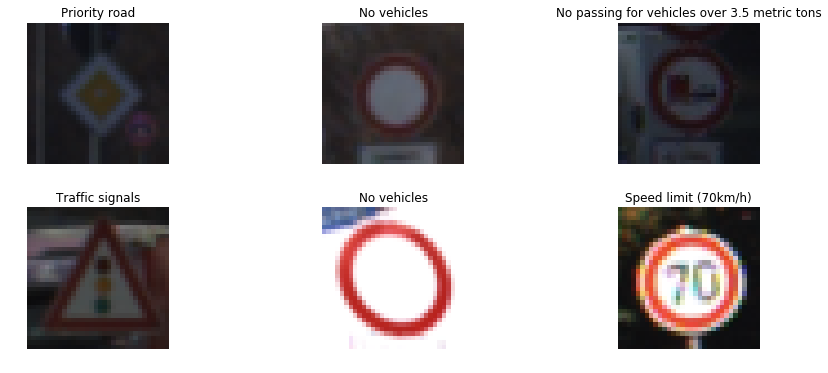

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

#read the name of the classes
labels_txt = np.genfromtxt('signnames.csv', skip_header=1, 
                           dtype=[('myint','i8'), ('mysring','S55')], delimiter=',')

# show 6 random training images 
fig, axs = plt.subplots(2,3, figsize=(15, 6))
fig.subplots_adjust(hspace = .3)
axs = axs.ravel()
for i in range(6):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(labels_txt[y_train[index]][1].decode('ascii'))
    
#Save the images
plt.savefig('info_output/' + 'Data_exploration.jpg')

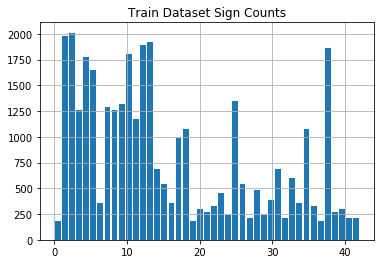

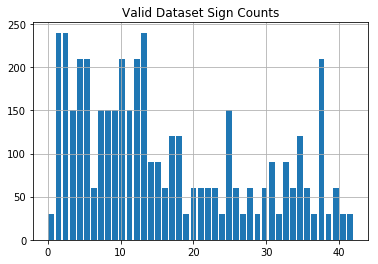

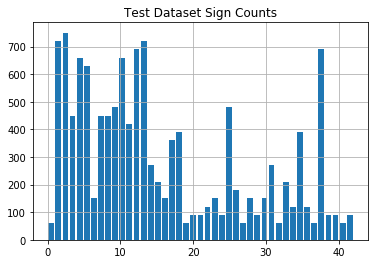

In [6]:
# histogram of label frequency

# Train Dataset
fig = plt.figure()
hist, bins = np.histogram(y_train, bins=n_classes)
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center')
plt.grid()
plt.title("Train Dataset Sign Counts")
plt.show()

#Save the histogram
fig.savefig('info_output/' + 'Hist_train_orig.jpg')


# Valid Dataset
fig = plt.figure()
hist, bins = np.histogram(y_valid, bins=n_classes)
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center')
plt.grid()
plt.title("Valid Dataset Sign Counts")
plt.show()

#Save the histogram
fig.savefig('info_output/' + 'Hist_validate.jpg')


# Test Dataset
fig = plt.figure()
hist, bins = np.histogram(y_test, bins=n_classes)
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center')
#plt.bar(center, hist, align='center')
plt.grid()
plt.title("Test Dataset Sign Counts")
plt.show()

#Save the histogram
fig.savefig('info_output/' + 'Hist_test.jpg')

## Step 1.2: Augment the Data

Augmenting the training set might help improve model performance. The goal in this section is to double the number of images per class in the training dataset.

### Data Augmentation Methods

In [7]:
def random_translate(img, cx = 3):
    # Applies a random displacement (x and y) between [cx, cx) pixels
    rows,cols = img.shape[0:2]
    
    tx,ty = np.random.randint(-cx,cx,2)

    M = np.float32([[1,0,tx],[0,1,ty]])
    im_out = cv2.warpAffine(img,M,(cols,rows))
    
    return im_out

def random_scaling(img, cx = 3): 
    # Applies a random scaling, from the limits [cx, cx)
    # 0: No scaling
    # -n: Zoom In
    # n : Zoom out
    
    rows,cols = img.shape[0:2]

    px = np.random.randint(-cx, cx)

    # starting locations (4 corners)
    src = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])
    
    # ending locations
    dst = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])

    M = cv2.getPerspectiveTransform(src,dst)

    im_out = cv2.warpPerspective(img,M,(rows,cols))
    
    return im_out

def random_rotate(img, cd = 15):
    # Applies a random rotation between -cd and cd degrees
    c_x,c_y = int(img.shape[0]/2), int(img.shape[1]/2)
    ang = random.uniform(-1, 1)*cd
    Mat = cv2.getRotationMatrix2D((c_x, c_y), ang, 1.0)
    im_out = cv2.warpAffine(img, Mat, img.shape[:2])
    return im_out

def augment_data(img, typ):
    # Applies a random transformation
    if typ == 1:
        im_out = random_translate(img)
    elif typ == 2:
        im_out = random_scaling(img)
    else:
        im_out = random_rotate(img)
    return im_out

### Tests

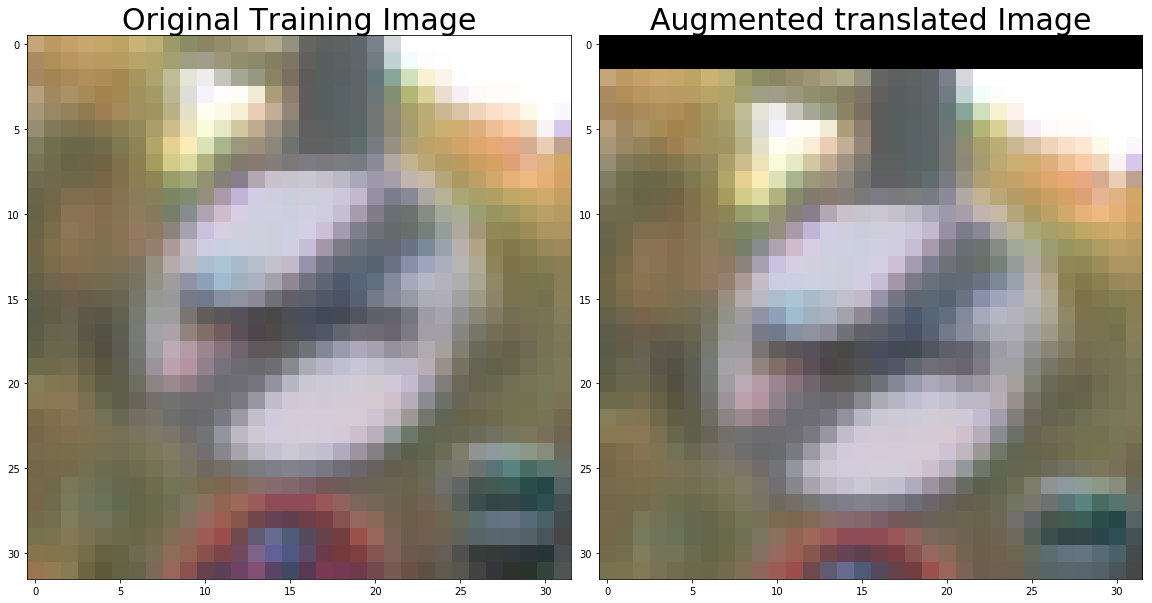

In [8]:
# Applies a translation
dummy_img = random_translate(X_train[100])

# Show the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(X_train[100])
ax1.set_title('Original Training Image', fontsize=30)
ax2.imshow(dummy_img)
ax2.set_title('Augmented translated Image', fontsize=30)

#Save the image
plt.savefig('info_output/' + 'Aug_translation.jpg')

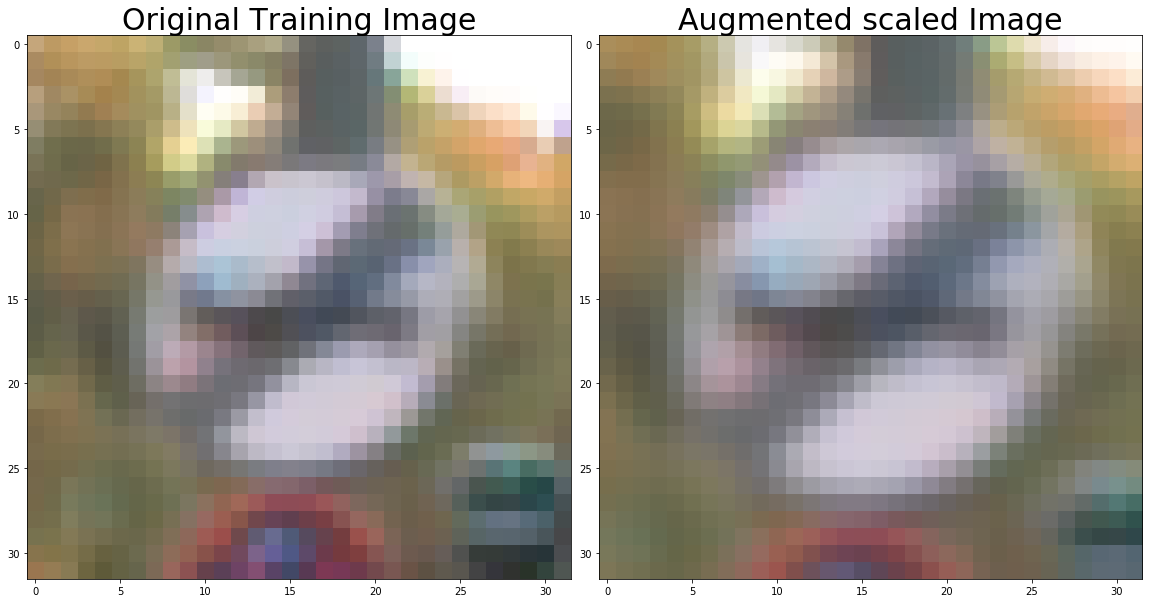

In [9]:
# Applies a scaling
dummy_img = random_scaling(X_train[100])

# Show the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(X_train[100])
ax1.set_title('Original Training Image', fontsize=30)
ax2.imshow(dummy_img)
ax2.set_title('Augmented scaled Image', fontsize=30)

#Save the image
plt.savefig('info_output/' + 'Aug_scaling.jpg')

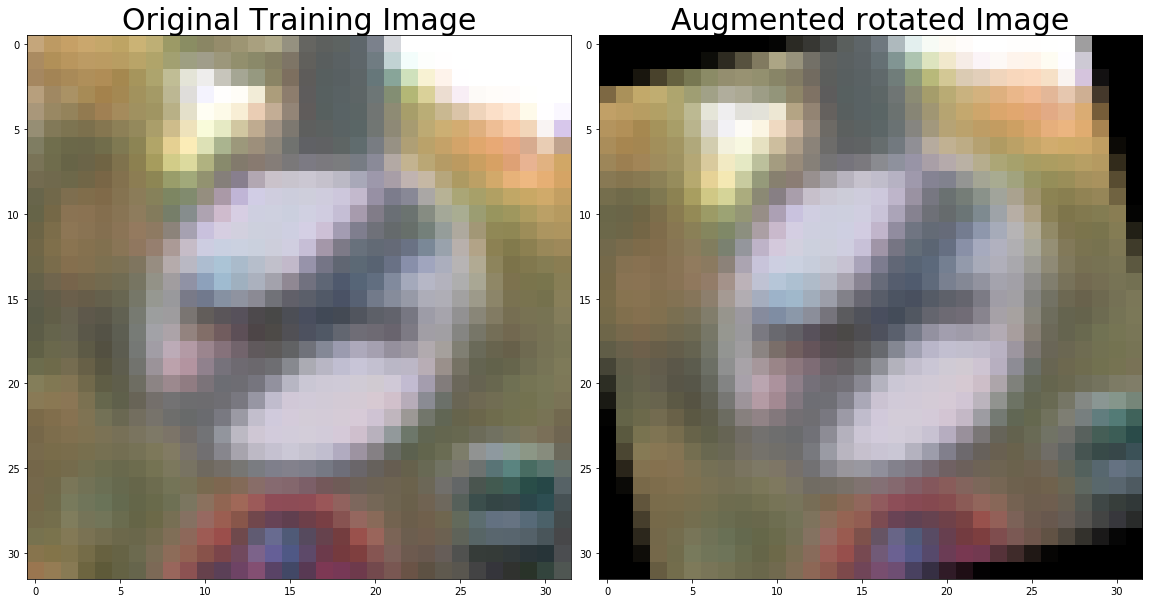

In [10]:
# Applies a rotation
dummy_img = random_rotate(X_train[100])

# Show the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(X_train[100])
ax1.set_title('Original Training Image', fontsize=30)
ax2.imshow(dummy_img)
ax2.set_title('Augmented rotated Image', fontsize=30)

#Save the image
plt.savefig('info_output/' + 'Aug_rotate.jpg')

## Augment the Training Dataset

In [ ]:
for index in range(len(X_train)):
    print('Generating new data.')
    
    img     = X_train[index]
    n_class = y_train[index]
    
    # generate a random int to select the transformation to use
    typ = np.random.randint(1, 7)

    # if typ is even, then the algorithm executes two different transformations,
    # else, executes only one
    if typ % 2 != 0:
        img_out = augment_data(img, (typ // 2) - 1)
    else:
        img_out = augment_data(img, (typ // 2))
        typ2 = np.random.randint(1, 4)
        if typ2 == typ // 2:
            if typ2 + 1 == 4:
                typ2 = typ2 - 1
            else:
                typ2 = typ2 + 1
        img_out = augment_data(img, typ2)
    X_train = np.concatenate((X_train, [img_out]), axis=0)
    y_train = np.concatenate((y_train, [n_class]), axis=0)
    print('Additional data generated')

In [11]:
print('Generating new data.')
print('Additional data generated')

Generating new data.
Additional data generated


In [13]:
def save_dataset(training_file):
    # Write training dataset to a file
    mydict = {'labels': y_train, 'features': X_train}

    output = open(training_file, 'wb')
    pickle.dump(mydict, output)
    output.close()

In [14]:
# Write augmented training dataset to a file
training_file_aug = "../data/train_aug.p"
save_dataset(training_file_aug)

### * Personal Checkpoint:

From this point, the process can be restarted, using the augmented training dataset

In [12]:
# Load the augmented training dataset
training_file_aug = "../data/train_aug.p"
with open(training_file_aug, mode='rb') as f:
    train_dummy = pickle.load(f)

X_train, y_train = train_dummy['features'], train_dummy['labels']
print("Number of training data =", len(y_train))

Number of training data = 69598


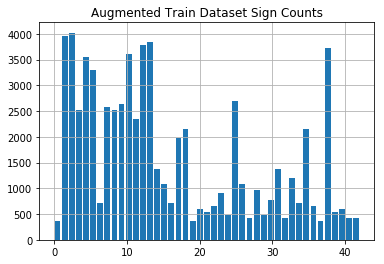

In [15]:
# histogram of label frequency

# Train Dataset
fig = plt.figure()
hist, bins = np.histogram(y_train, bins=n_classes)
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center')
plt.grid()
plt.title("Augmented Train Dataset Sign Counts")
plt.show()

#Save the histogram
fig.savefig('info_output/' + 'Hist_train_aug.jpg')

### Balance the Data

In the histogram of the augmented training dataset,  a large imbalance is observed between the images in some classes with respect to others (example: class 0 has about 360 data, class 2 has around 4000). The objective of this section is to increase the amount of images in the classes lacking data to an average value of all the classes.

In [16]:
def balance_data(X_images, y_images):
    print('Generating new data.')
    # The amount of data per class is calculated, and the average of that amount
    data_per_class = np.bincount(y_images)
    mean_data = int(np.mean(data_per_class))

    show = True
    img_data = []
    y_out = []
    
    for i in range(len(data_per_class)):

        # Check if the data per class is less than the mean
        if data_per_class[i] < mean_data:

            # Count how many additional images we need
            balance_data = mean_data - data_per_class[i]
            img_class = np.where(y_images == i)

            index = 0
            
            # Generate the new data using all the images of the current class
            for num in range(balance_data):
                if index == data_per_class[i]:
                    index = 0
                img = X_images[img_class[0][index]]
                index = index + 1

                # Random transformations are made
                
                # if typ is even, then the algorithm executes two different transformations,
                # else, executes only one
                typ = np.random.randint(1, 7)
                if typ % 2 != 0:
                    img_out = augment_data(img, (typ // 2) - 1)
                else:
                    img_out = augment_data(img, (typ // 2))
                    typ2 = np.random.randint(1, 4)
                    if typ2 == typ // 2:
                        if typ2 + 1 == 4:
                            typ2 = typ2 - 1
                        else:
                            typ2 = typ2 + 1
                    img_out = augment_data(img, typ2)
                    
                img_data.append(img_out)
                y_out.append(i)
            
    print('Additional data generated', 'the classes lacking data now have '
          +str(mean_data)+ ' images')
    return img_data, y_out

        
img_data, y_out = balance_data(X_train, y_train)
    

Generating new data.
Additional data generated the classes lacking data now have 1618 images


In [17]:
# Concatenate the new data to the training dataset
X_train = np.concatenate((X_train, img_data), axis=0)
y_train = np.concatenate((y_train, y_out), axis=0)

# Write balanced training dataset to a file
training_file_aug = "../data/train_aug_balance.p"
save_dataset(training_file_aug)

### * Personal Checkpoint:

From this point, the process can be restarted, using the balanced training dataset

In [18]:
# Load the balanced training dataset
training_file_aug = "../data/train_aug_balance.p"
with open(training_file_aug, mode='rb') as f:
    train_dummy = pickle.load(f)

X_train, y_train = train_dummy['features'], train_dummy['labels']
print("Number of training data =", len(y_train))

Number of training data = 93428


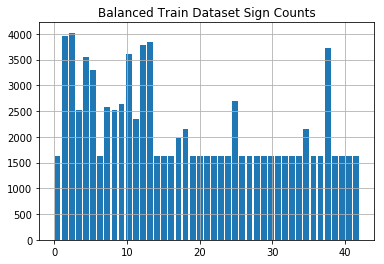

In [19]:
# histogram of label frequency

# Train Dataset
fig = plt.figure()
hist, bins = np.histogram(y_train, bins=n_classes)
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center')
plt.grid()
plt.title("Balanced Train Dataset Sign Counts")
plt.show()

#Save the histogram
fig.savefig('info_output/' + 'Hist_train_balanced.jpg')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Central Functions (Preprocessing)

In [20]:
def rgb_to_gray(img):
    # Convert an RGB image to Grayscale
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def normalize_img(img):
    #normalizes the input image so that the data has mean zero
    src = np.array((img-128.0)/128.0, dtype=np.float32)
    return src.reshape(32,32,1)



In [21]:
# Preprocess the Data
train_grays    = [rgb_to_gray(img) for img in X_train]
features_train = [normalize_img(img) for img in train_grays]
labels_train  = y_train

valid_grays    = [rgb_to_gray(img) for img in X_valid]
features_valid = [normalize_img(img) for img in valid_grays]
labels_valid  = y_valid

test_grays    = [rgb_to_gray(img) for img in X_test]
features_test = [normalize_img(img) for img in test_grays]
labels_test   = y_test


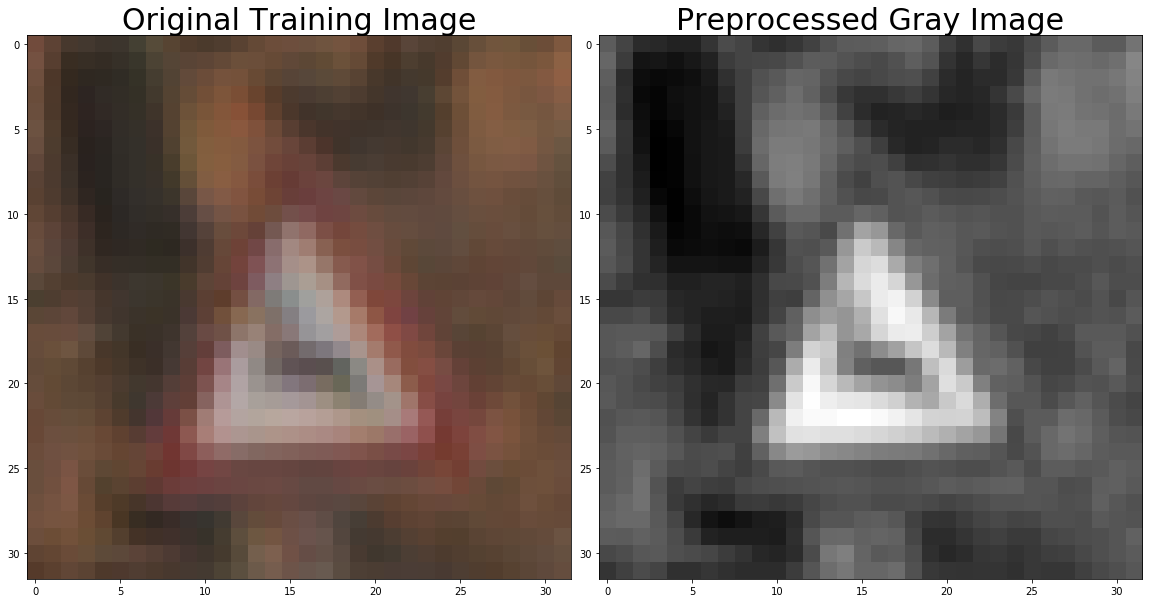

In [22]:
# Show the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(X_train[300])
ax1.set_title('Original Training Image', fontsize=30)
ax2.imshow(features_train[300].squeeze(), cmap = 'gray')
ax2.set_title('Preprocessed Gray Image', fontsize=30)

#Save the image
plt.savefig('info_output/' + 'preprocessed.jpg')


### Model Architecture

In [23]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def conv2d(x, W, b, strides=1):
    # Builder of a convolutional layer
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    print("Convolutional Shape: {}".format(x[0].shape))
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    # Builder of a Pooling (Max) layer
    y = tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='VALID')
    print("pool Shape: {}".format(y[0].shape))
    return y

def LeNet(x, keep_prob, input_dimm, n_classes):
    ## Builder of the CNN
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Store layers weight & bias
    weights = {
        'wc1': tf.Variable(tf.truncated_normal(shape=(5, 5, input_dimm, 6), mean = mu, stddev = sigma)),
        'wc2': tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma)),
        'wd1': tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma)),
        'wd2': tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma)),
        'out': tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))}

    
    biases = {
        'bc1': tf.Variable(tf.zeros(6)),
        'bc2': tf.Variable(tf.zeros(16)),
        'bd1': tf.Variable(tf.zeros(120)),
        'bd2': tf.Variable(tf.zeros(84)),
        'out': tf.Variable(tf.zeros(n_classes))}
    
    # Layer 1: Convolutional. Input = 32x32xC. Output = 28x28x6.    
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Activation.
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1, k=2)
    
    #conv1d = tf.nn.dropout(conv1, keep_prob)
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Activation.
    conv2 = tf.nn.relu(conv2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d(conv2, k=2)

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
        
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.add(tf.matmul(fc0, weights['wd1']), biases['bd1'])
    # Activation.
    fc1 = tf.nn.relu(fc1)
    # Dropout regularization
    fd1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fd1, weights['wd2']), biases['bd2'])
    # Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Layer 5: Fully Connected. Input = 84. Output = n_classes.
    logits = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    
    return logits

### Prepare Tensors

In [24]:
### Features and Labels (Tensors)
feature_shape = features_train[1].shape
x = tf.placeholder(tf.float32, shape=(None,)+feature_shape)
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

# drop out layer parameter
keep_prob = tf.placeholder(tf.float32)

logits = LeNet(x, keep_prob, feature_shape[2], n_classes)

Convolutional Shape: (28, 28, 6)
pool Shape: (14, 14, 6)
Convolutional Shape: (10, 10, 16)
pool Shape: (5, 5, 16)


### Train, Validate and Test the Model

In [126]:
# Model Evaluation
prediction_step = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuary_step = tf.reduce_mean(tf.cast(prediction_step, tf.float32))
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuary_step, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [30]:
### Training Pipeline

## Create the model saver
# Create a directory for the model
dir_model = 'my_model/'
if not os.path.exists(dir_model):
    os.makedirs(dir_model)
saver = tf.train.Saver()
model_file = dir_model+'newModel'

# Define training parameters
epoch = 20
#batch_size = 128
#rate = 0.001
batch_size = 64
rate = 0.005

## Train using Adam optimizer to minimize the cross entropy (loss)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss = tf.reduce_mean(cross_entropy)

# Use an decay learning rate
global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(rate, global_step,
                                           batch_size, 0.99, staircase=True)

train_step  = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss, global_step=global_step)

# Start the training
def train(X_data, y_data):
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        print("starting ...")
        
        for i in range(epoch):
            X_train, y_train = shuffle(X_data, y_data)
            num_samples = len(X_train)
            
            for offset in range(0, num_samples, batch_size):
                end = offset + batch_size
                features, labels = X_train[offset:end], y_train[offset:end]
                sess.run(train_step, feed_dict={x : features, y : labels, keep_prob: 0.5})

            validation = evaluate(features_valid, labels_valid)
            train_perc = evaluate(features, labels)
            print("epoch {0}/{1}: trainning = {2:.3f} , validation = {3:.3f}".format(i+1, epoch, train_perc,
                                                                                     validation))
            #print(myout)
        saver.save(sess, model_file);
        print("model saved into {}".format(model_file))

In [31]:
# train
train(features_train, labels_train)

starting ...
epoch 1/20: trainning = 0.904 , validation = 0.891
epoch 2/20: trainning = 0.885 , validation = 0.929
epoch 3/20: trainning = 0.962 , validation = 0.934
epoch 4/20: trainning = 0.923 , validation = 0.955
epoch 5/20: trainning = 0.942 , validation = 0.956
epoch 6/20: trainning = 0.942 , validation = 0.963
epoch 7/20: trainning = 0.962 , validation = 0.951
epoch 8/20: trainning = 0.962 , validation = 0.962
epoch 9/20: trainning = 0.962 , validation = 0.961
epoch 10/20: trainning = 0.942 , validation = 0.959
epoch 11/20: trainning = 1.000 , validation = 0.961
epoch 12/20: trainning = 0.942 , validation = 0.964
epoch 13/20: trainning = 0.981 , validation = 0.966
epoch 14/20: trainning = 1.000 , validation = 0.965
epoch 15/20: trainning = 0.981 , validation = 0.966
epoch 16/20: trainning = 0.981 , validation = 0.965
epoch 17/20: trainning = 0.981 , validation = 0.966
epoch 18/20: trainning = 1.000 , validation = 0.967
epoch 19/20: trainning = 0.942 , validation = 0.967
epoch 20

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### calculate classification accuracy

In [32]:
predict_logits_operation = tf.argmax(logits, 1)
def predict(X_data):
    predicted_logits = list()
    with tf.Session() as sess:
        saver.restore(sess, model_file)
        predicted_logits.extend( sess.run(predict_logits_operation, feed_dict={x: X_data, keep_prob: 1.0}))
    return predicted_logits


In [33]:
# Global Accuracy
with tf.Session() as sess:
    saver.restore(sess, model_file)
    print('Accuracy Model On Training Images: {:.2f}'.format(evaluate(features_train, labels_train)))
    print('Accuracy Model On Validation Images: {:.2f}'.format(evaluate(features_valid, labels_valid))) 
    print('Accuracy Model On Test Images: {:.2f}'.format(evaluate(features_test,labels_test)))

INFO:tensorflow:Restoring parameters from my_model/newModel
Accuracy Model On Training Images: 0.99
Accuracy Model On Validation Images: 0.97
Accuracy Model On Test Images: 0.95


In [34]:
# Training Confusion Matrix
Result = predict(features_train)
cm_tr = confusion_matrix(Result, labels_train)

# Validation Confusion Matrix
Result = predict(features_valid)
cm_v = confusion_matrix(Result, labels_valid)

# Validation Confusion Matrix
Result = predict(features_test)
cm_te = confusion_matrix(Result, labels_test)

INFO:tensorflow:Restoring parameters from my_model/newModel
INFO:tensorflow:Restoring parameters from my_model/newModel
INFO:tensorflow:Restoring parameters from my_model/newModel


In [36]:
# Show accuracy per class
titles_list = ["Training", "Validation", "Testing"]
title_format ="{:>30}" * (len(titles_list) + 1)
print ('{:<50s}{:>15s}{:>15s}{:>15s}'.format("", *titles_list))
for it in range(n_classes):
    perc_tr = (cm_tr[it, it])/np.sum(cm_tr[:, it])
    perc_v = (cm_v[it, it])/np.sum(cm_v[:, it])
    perc_te = (cm_te[it, it])/np.sum(cm_te[:, it])
    print ('{0}:{1:<50s}{2:>13.2f}%{3:13.2f}%{4:>15.1f}%'.format(it,
        labels_txt[it][1].decode('ascii'), perc_tr*100, perc_v*100, perc_te*100))

                                                         Training     Validation        Testing
0:Speed limit (20km/h)                                      97.96%        80.00%           70.0%
1:Speed limit (30km/h)                                      97.90%        97.08%           97.1%
2:Speed limit (50km/h)                                      97.36%        96.25%           95.9%
3:Speed limit (60km/h)                                      97.78%       100.00%           94.0%
4:Speed limit (70km/h)                                      98.87%        99.05%           95.2%
5:Speed limit (80km/h)                                      97.58%        93.81%           91.7%
6:End of speed limit (80km/h)                               99.38%       100.00%           92.7%
7:Speed limit (100km/h)                                     96.74%        95.33%           88.2%
8:Speed limit (120km/h)                                     99.13%        99.33%           98.4%
9:No passing                   

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

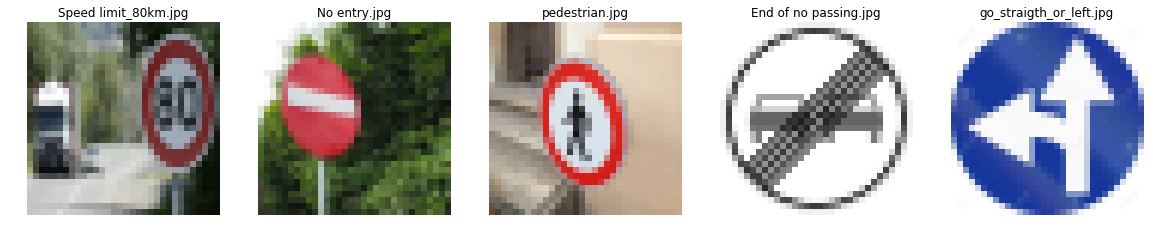

In [148]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
index_t = 0
img_new = []
f, axes = plt.subplots(1, 5, figsize=(20,10))
for im_in in glob.glob('./my_images/*'):
    
    # Load and resize images
    img = cv2.cvtColor(cv2.imread(im_in), cv2.COLOR_BGR2RGB)
    resized = cv2.resize(img, (32,32), interpolation = cv2.INTER_AREA)
    
    # Show images
    axes[index_t].imshow(resized)
    axes[index_t].axis('off')
    axes[index_t].set_title(os.path.split(im_in)[1])
    index_t = index_t + 1
    
    #preprocess images
    img_out = normalize_img(rgb_to_gray(resized))
    img_new.append(img_out)
    
#Save the image
plt.savefig('info_output/' + 'new_images.jpg')   
    

### Predict the Sign Type for Each Image

In [149]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
result_new = predict(img_new)
true_labels = [
    labels_txt[5][1].decode('ascii'),
    labels_txt[17][1].decode('ascii'),
    labels_txt[27][1].decode('ascii'),
    labels_txt[41][1].decode('ascii'),
    labels_txt[37][1].decode('ascii')
]

# classifier accuracy for new images
acc_img = 0

print ('{0:<30s}{1:>10s}'.format("True label", "Result label"))
symb = "_ _ "*5
print('{0:<30s}{1:>10s}'.format(symb, symb))
for it in range(5):
    print ('{0:<30s}{1:>10s}'.format(true_labels[it], 
                                     labels_txt[result_new[it]][1].decode('ascii')))
    if true_labels[it] == labels_txt[result_new[it]][1].decode('ascii'):
        acc_img = acc_img + 1

INFO:tensorflow:Restoring parameters from my_model/newModel
True label                    Result label
_ _ _ _ _ _ _ _ _ _           _ _ _ _ _ _ _ _ _ _ 
Speed limit (80km/h)          Dangerous curve to the left
No entry                      Keep right
Pedestrians                   Ahead only
End of no passing             End of no passing
Go straight or left           Go straight or left


### Analyze Performance

In [150]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
acc_img = acc_img/5.0

#Calculate accuracy New Images
print('Accuracy Model On New Images: {:.2f}%'.format(acc_img*100))

Accuracy Model On New Images: 40.00%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [151]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
def prediction_top(features):
    with tf.Session() as sess:
        saver.restore(sess, model_file)
        pred = tf.nn.softmax(logits)
        results = sess.run(tf.nn.top_k(pred, k=5), {x : features, keep_prob:1.0})
        return results
    
top_predict = prediction_top(img_new)

INFO:tensorflow:Restoring parameters from my_model/newModel


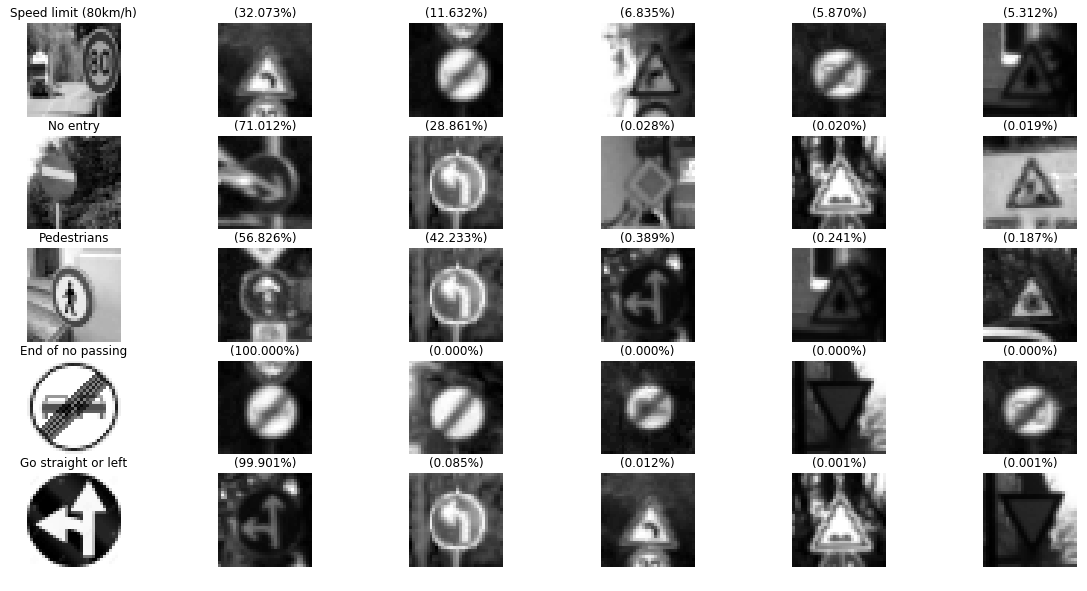

In [188]:
index_t = 0
f, axes = plt.subplots(5, 6, figsize=(20,10))
for it in range(5):
    axes[it, 0].imshow(img_new[it].squeeze(), cmap = 'gray')
    axes[it, 0].axis('off')
    axes[it, 0].set_title(true_labels[it])
    for jt in range(5):
        im_out = features_valid[np.argwhere(labels_valid == top_predict[1][it][jt])[0][0]]
        axes[it, jt+1].imshow(im_out.squeeze(), cmap = 'gray')
        axes[it, jt+1].axis('off')
        str_perc = '({:.3f}%)'.format(top_predict[0][it][jt]*100)
        axes[it, jt+1].set_title(str_perc)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")